## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np


# YOUR CODE STARTS HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    accur_target = 0.998
    if(logs['accuracy']>accur_target):
      print('\n Reached %0.1f training accuracy. Training converged!' %(accur_target*100))
      self.model.stop_training = True

callback = myCallback()
# YOUR CODE ENDS HERE


mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# YOUR CODE STARTS HERE
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

max_value = max(np.amax(np.amax(training_images, axis=0), axis=1))
print(max_value)
training_images = training_images/max_value
test_images = test_images/max_value
# YOUR CODE ENDS HERE


model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=20, callbacks=[callback])



test_loss = model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 0
print('\ntest example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )


# YOUR CODE ENDS HERE



TensorFlow 2.x selected.
[255]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                692288    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 1

In [0]:
i=0
for val in test_labels[:20]:
  max_idx = np.argmax( test_predictions[i], axis=0 ) 
  print('test example, label and prediction: %d - %d vs %d' %(i, val, max_idx))
  i+=1

test example, label and prediction: 0 - 7 vs 7
test example, label and prediction: 1 - 2 vs 2
test example, label and prediction: 2 - 1 vs 1
test example, label and prediction: 3 - 0 vs 0
test example, label and prediction: 4 - 4 vs 4
test example, label and prediction: 5 - 1 vs 1
test example, label and prediction: 6 - 4 vs 4
test example, label and prediction: 7 - 9 vs 9
test example, label and prediction: 8 - 5 vs 5
test example, label and prediction: 9 - 9 vs 9
test example, label and prediction: 10 - 0 vs 0
test example, label and prediction: 11 - 6 vs 6
test example, label and prediction: 12 - 9 vs 9
test example, label and prediction: 13 - 0 vs 0
test example, label and prediction: 14 - 1 vs 1
test example, label and prediction: 15 - 5 vs 5
test example, label and prediction: 16 - 9 vs 9
test example, label and prediction: 17 - 7 vs 7
test example, label and prediction: 18 - 3 vs 3
test example, label and prediction: 19 - 4 vs 4


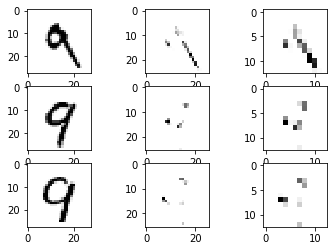

In [0]:
# Plotting the Convolutions and Poolings for three different test examples:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,3)
FIRST_IMAGE=7
SECOND_IMAGE=12
THIRD_IMAGE=16
CONVOLUTION_NUMBER = 0  # out of the 64 chosen in the model set-up
colormap = 'Greys'
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28, 28), cmap=colormap)
axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28, 28), cmap=colormap)
axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28, 28), cmap=colormap)
for x in range(0,2,1):  # loop thru the first 2 layers (which are the 1 conv and the 1 pool)
  # image 1:
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]   # choosing layer x (0 to 3) and then reshape it to a readable image.
  axarr[0,x+1].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap=colormap)
  axarr[0,x+1].grid(False)
  # image 2:
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x+1].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap=colormap)
  axarr[1,x+1].grid(False)
  # image 3:
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x+1].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap=colormap)
  axarr[2,x+1].grid(False)